# Vehicle Classification Using CNN with accuracy over 99%

Vehicle detection image dataset consist of vehicles and non-vehicle images. The data is classified by the folders. Each folder contain up to x vehicle images and x non-vehicles images. The dimension of images in (64x64x3) which are RGB images. We to do following steps to using CNN as image classification method in vehicle and non-vehicles image classification.

1. Read all images and convert to dataframe
2. Check data distribution
3. Data Augmentation
4. Define Model
5. Train Model
6. Evaluate the model


# Import Library
We need to import some of the library that to be used. 

1. OS        : For directory managing
2. CV2       : For manage images
3. re        : To manage filles
4. Pandas    : To create dataframe
5. Matplolib : To visualize
6. Sklearn   : For splitting and use confusion matrix
7. Tensorflow
8. Numpy     : To do data structuring

In [1]:
import tensorflow as tf
import os
import cv2
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import numpy as np

base_dir = "data"

C:\Users\Axcel\anaconda3\envs\DL\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Axcel\anaconda3\envs\DL\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Axcel\anaconda3\envs\DL\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Axcel\anaconda3\envs\DL\lib\site-packages\tensorboar

# 1. Read images and convert to dataframe

First we need to read all images and label in directory and assign to list variable

In [2]:

label = []       #  Assign all label
images_path = [] # Get all images path
all_images = []  # Check all images name
idx = 0          # index
img_label = []   # Assign image label



for directory in os.listdir(base_dir):
    label.append(directory)
    for img in os.listdir(os.path.join(base_dir,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(base_dir,directory),img)
            all_images.append(img)
            images_path.append(img_path)
            img_label.append(directory)


- Check total data,label, and shape of each images

In [3]:
img_shape = cv2.imread(images_path[0])

print(f"Labels : { label}")
print(f"Total Images : {len(all_images)}")
print(f" Images shape : {img_shape.shape}")

Labels : ['non-vehicles', 'vehicles']
Total Images : 516
 Images shape : (64, 64, 3)


- Convert to dataframe using pandas

In [4]:
data =pd.DataFrame({'image':images_path,'label':img_label}) 
data

,image,label
0,data\non-vehicles\extra1.png,non-vehicles
1,data\non-vehicles\extra10.png,non-vehicles
2,data\non-vehicles\extra11.png,non-vehicles
3,data\non-vehicles\extra12.png,non-vehicles
4,data\non-vehicles\extra13.png,non-vehicles
...,...,...
511,data\vehicles\95.png,vehicles
512,data\vehicles\96.png,vehicles
513,data\vehicles\97.png,vehicles
514,data\vehicles\98.png,vehicles


- Shuffle dataset distributuin

In [5]:
data = data.sample(frac=1).reset_index()
data.head()

,index,image,label
0,32,data\non-vehicles\extra40.png,non-vehicles
1,440,data\vehicles\30.png,vehicles
2,99,data\non-vehicles\image1392.png,non-vehicles
3,228,data\vehicles\107.png,vehicles
4,342,data\vehicles\211.png,vehicles


- plot first 8 images

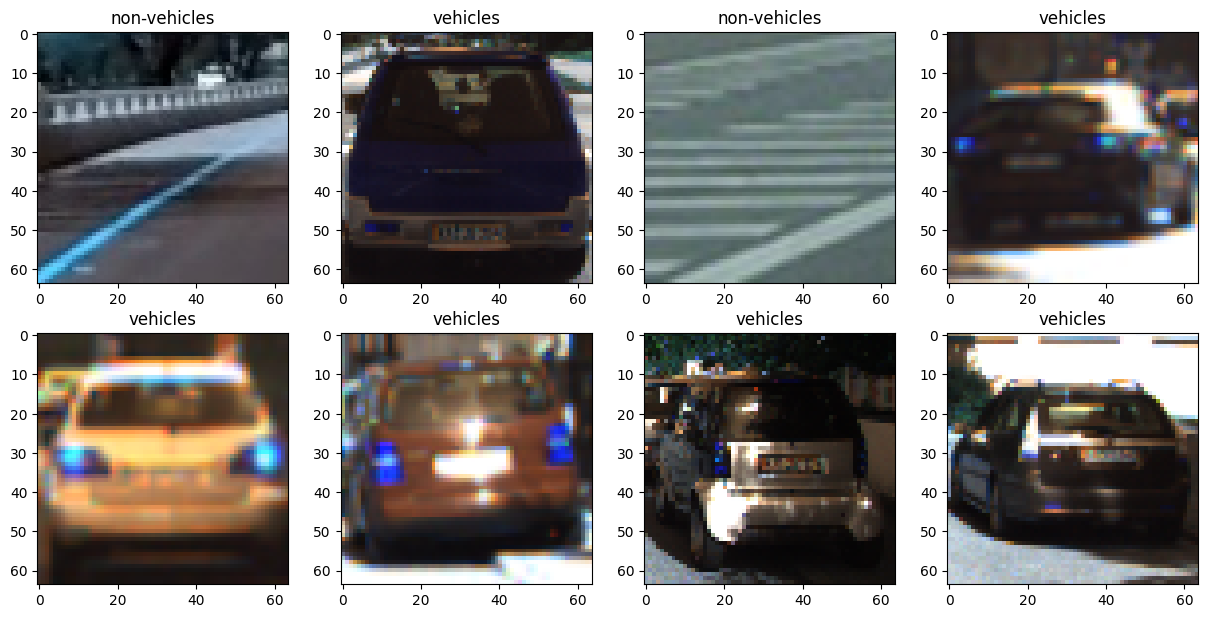

In [6]:
fig = plt.figure(figsize=(15,15))

for i in range(8):
    fig.add_subplot(4,4,i+1).set_title(data['label'][i])
    img = cv2.imread(data['image'][i])
    plt.imshow(img)
    
plt.show()


# 2. Check Data Distribution

We need to check the data distribution class. From the bar plot we can see either vehicle and non vehicle have similiar amount of data

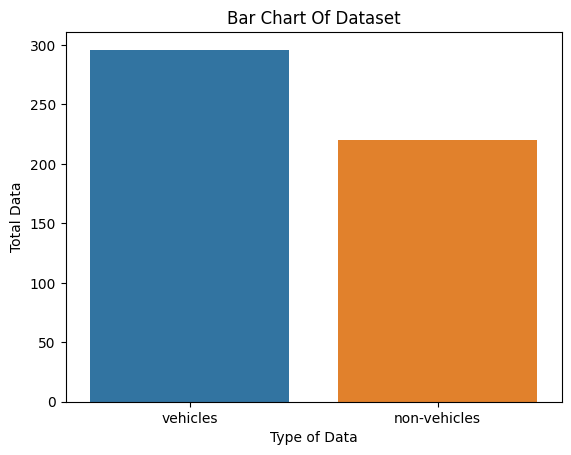

Total Images class [0]:296
Total Images class [1]:220


In [7]:
data_label = data['label'].value_counts()
plt.figure()
sns.barplot(x = data_label.index, y = data_label)
plt.xlabel("Type of Data")
plt.ylabel("Total Data")
plt.title("Bar Chart Of Dataset")
plt.show()
print(f"Total Images class [0]:{data_label[0]}")
print(f"Total Images class [1]:{data_label[1]}")

- Split data to data training and data testing

In [8]:
X_train,X_test = train_test_split(data,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(412, 3)
(104, 3)


# 3. Data Augmentation

To increase number of data to train, we can use data augmentation. Data augmentation only used for training not for testing. Some method that used :
- Shear range
- Zoom range
- rotation range
- width shift range
- height shift range
- horizontal flip
- validation split


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.1,
                                    rotation_range = 25,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

- Implement data augmentation to training set, validation set and test set

In [10]:
training_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")

validation_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")

test_set = test_datagen.flow_from_dataframe(
    dataframe = X_test,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    shuffle = False,
    batch_size = 32)


Found 330 validated image filenames belonging to 2 classes.
Found 82 validated image filenames belonging to 2 classes.
Found 104 validated image filenames belonging to 2 classes.


- Check total images from each set

In [11]:
print(f" Total training images {X_train.shape[0]}")
print(f" Total test images {X_test.shape[0]}")

print(f" Train Set Size : {(training_set.samples)}")
print(f" Validation Set Size : {(validation_set.samples)}")
print(f" Testing Set Size : {(test_set.samples)}")

 Total training images 412
 Total test images 104
 Train Set Size : 330
 Validation Set Size : 82
 Testing Set Size : 104


# 4. Define Model
From the data, there are only 2 type of classes either vehicle or not. For 2 classes problem we can use sigmoid or softmax as output layers. At this notebook we use softmax with 2 neuron as output to represent each classes. We also define input of first layer at CNN is 64 x 64 x 3 as the original shape and channel of the data images

In [60]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

- Use optimizer adam and loss categorical crossentropy because we use softmax (multiple classes)

In [61]:
model.compile(optimizer = 'adam', loss= "categorical_crossentropy", metrics=["acc"])

- Use early_stopping to stop training if the accuracy of model won't get higher

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)


# 5. Train Model
Train model with early stopping callback function. We also use validation set as validation data

In [65]:
history = model.fit(training_set, epochs=20,validation_data = validation_set, callbacks=[early_stopping],batch_size=32)

Epoch 1/20
11/11 [==============================] - 1s 90ms/step - loss: 0.3452 - acc: 0.9242 - val_loss: 0.3589 - val_acc: 0.9268
Epoch 2/20
11/11 [==============================] - 1s 100ms/step - loss: 0.3262 - acc: 0.9273 - val_loss: 0.3362 - val_acc: 0.9390
Epoch 3/20
11/11 [==============================] - 1s 85ms/step - loss: 0.3222 - acc: 0.9515 - val_loss: 0.3423 - val_acc: 0.9268
Epoch 3: early stopping


# 6. Evaluate Model
We need to check the model performance by looking at training accuracy and val accuracy through line plot

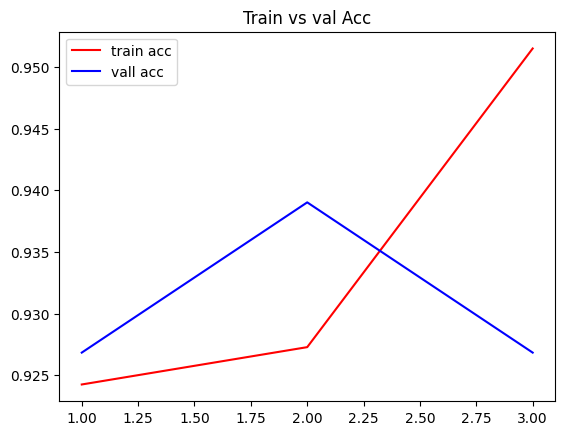

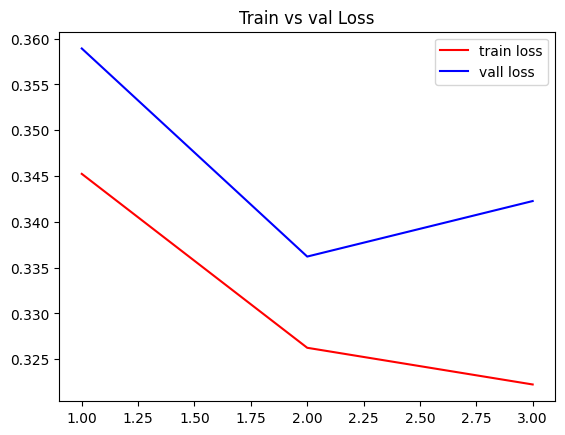

In [66]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history["loss"]
val_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)
plt.figure()
plt.title("Train vs val Acc")
plt.plot(epochs,train_acc,'red',label="train acc")
plt.plot(epochs,val_acc,'blue',label="vall acc")
plt.legend()
plt.show()

plt.figure()
plt.title("Train vs val Loss")
plt.plot(epochs,train_loss,'red',label="train loss")
plt.plot(epochs,val_loss,'blue',label="vall loss")
plt.legend()

plt.show()



- Check accuracy from test data

In [67]:
test_score = model.evaluate(test_set)

4/4 [==============================] - 0s 19ms/step - loss: 0.4642 - acc: 0.7981


- Print accuracy scores

In [68]:
print(f'Test Score:{test_score[1]}')
print(f'Test Loss:{test_score[0]}')

Test Score:0.7980769276618958
Test Loss:0.4641723334789276


- Convert predicted labels to array 

In [69]:

predicted_label = model.predict(test_set)
predicted_label = np.argmax(predicted_label,axis=1)
predicted_label

4/4 [==============================] - 0s 20ms/step


array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

- Convert test set labels to array

In [70]:
test_class =test_set.labels
test_class = np.array(test_class)
test_class2 = test_class.flatten()
test_class2

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [71]:
class_ind = test_set.class_indices
labels_id = list(class_ind.keys())
labels_id

['non-vehicles', 'vehicles']

Using Confusion Matrix and Classification Report To Evaluate The Model

              precision    recall  f1-score   support

non-vehicles       1.00      0.55      0.71        47
    vehicles       0.73      1.00      0.84        57

    accuracy                           0.80       104
   macro avg       0.87      0.78      0.78       104
weighted avg       0.85      0.80      0.78       104



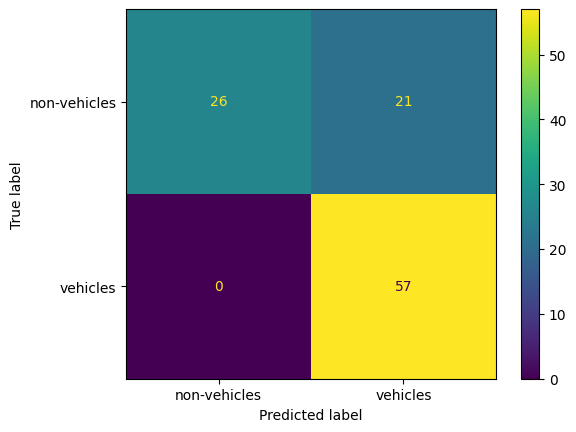

In [72]:

confusion_data = confusion_matrix(test_class2,predicted_label)

# Classification report
print(classification_report(test_class2, predicted_label, target_names= labels_id))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_data, display_labels = labels_id)

cm_display.plot()
plt.show()



- Check Predicted images and labels

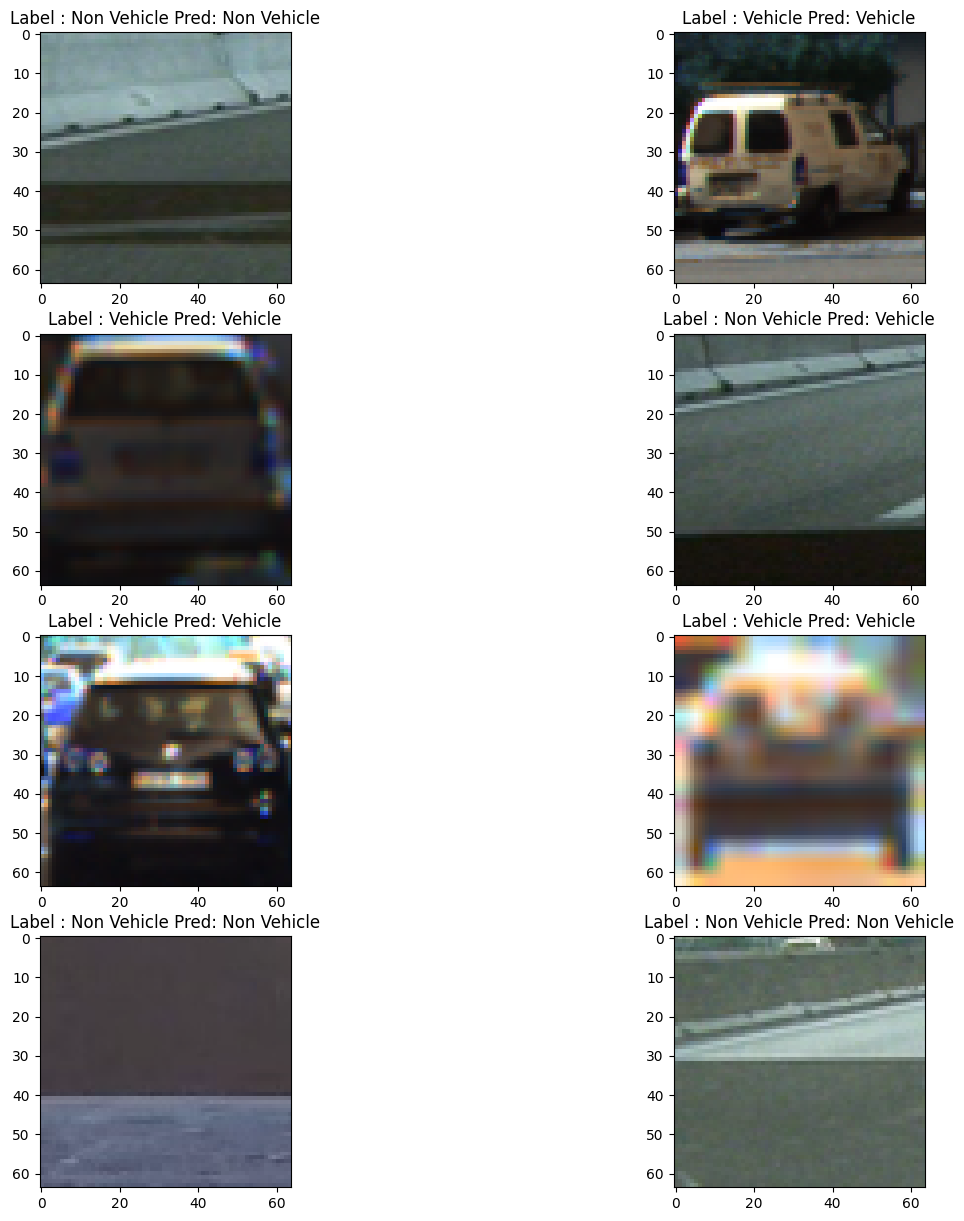

In [73]:
test_datas = test_set.filenames
labels_data = test_set.labels

fig = plt.figure(figsize=(15,15))

for i in range(8):
    if labels_data[i] == 0:
        test_label = "Non Vehicle"
    else:
        test_label = "Vehicle"
    if predicted_label[i] == 0:
        predict_lab = "Non Vehicle"
    else :
        predict_lab = "Vehicle"
    label = "Label : "+ test_label +" Pred: "+predict_lab
    
    fig.add_subplot(4,2,i+1).set_title(label)
    img = cv2.imread(test_datas[i])
    plt.imshow(img)
    
plt.show()


In [74]:
# Guardar la arquitectura del modelo
model_json = model.to_json()
with open("vehicle_recognition.json", "w") as json_file:
    json_file.write(model_json)

# Guardar los pesos del modelo
model.save_weights("vehicle_recognition.h5")

In [75]:
# Cargar la arquitectura del modelo previamente guardada
with open("vehicle_recognition.json", "r") as json_file:
    model_json = json_file.read()
model = tf.keras.models.model_from_json(model_json)

# Cargar los pesos previamente guardados
model.load_weights("vehicle_recognition.h5")

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo en un archivo .tflite
with open("vehicle_recognition.tflite", "wb") as tflite_file:
    tflite_file.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Axcel\AppData\Local\Temp\tmp1bvq4dqr\assets


INFO:tensorflow:Assets written to: C:\Users\Axcel\AppData\Local\Temp\tmp1bvq4dqr\assets


In [79]:
with open("vehicle_recognition.json", "r") as json_file:
    model_json = json_file.read()
model = tf.keras.models.model_from_json(model_json)

# Cargar los pesos previamente guardados
model.load_weights("vehicle_recognition.h5")

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model("vehicle_recognition.h5")
tflite_model = converter.convert()

# Guardar el modelo en un archivo .tflite
with open("vehicle_recognition.tflite", "wb") as tflite_file:
    tflite_file.write(tflite_model)

AttributeError: 'str' object has no attribute 'call'

In [59]:
import tensorflow as tf

# Carga o crea tu modelo en TensorFlow
model = tf.keras.models.load_model('vehicle_recognition.h5')

# Convierte el modelo a formato de Protocol Buffers
saved_model_path = 'vehicle_recognition'
tf.saved_model.save(model, saved_model_path)

print("Modelo guardado en formato .pb en:", saved_model_path)

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x000001CB00887148>.

In [56]:
import tensorflow as tf

# Carga el modelo TensorFlow Lite
model_path = 'vehicle_recognition.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Configura la cuantización posterior
converter = tf.lite.TFLiteConverter.from_saved_model('vehicle_recognition.h5')
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convierte el modelo con cuantización posterior
quantized_model = converter.convert()

# Guarda el modelo cuantizado en un nuevo archivo .tflite
quantized_model_path = 'vehicle_recognition_cuantizado.tflite'
with open(quantized_model_path, 'wb') as f:
    f.write(quantized_model)

print("Tamaño del modelo original:", os.path.getsize(model_path), "bytes")
print("Tamaño del modelo cuantizado:", os.path.getsize(quantized_model_path), "bytes")

OSError: SavedModel file does not exist at: vehicle_recognition.h5\{saved_model.pbtxt|saved_model.pb}

In [80]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('vehicle_recognition.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Axcel\AppData\Local\Temp\tmp2pj3tlb4\assets


INFO:tensorflow:Assets written to: C:\Users\Axcel\AppData\Local\Temp\tmp2pj3tlb4\assets


In [38]:
!pip install xxd

ERROR: Could not find a version that satisfies the requirement xxd (from versions: none)
ERROR: No matching distribution found for xxd


In [ ]:
!xdd -i vehicle_recognition.tflite > model_data.cc